# Python Libraries 1

_September 16, 2020_ 

Agenda today:
- Introduction to Numpy: array math
- Introduction to Pandas: importing, indexing, and math

In [ ]:
!pip install pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Part I. Numpy
The basic data structure that exist in numpy is called numpy arrays. NP arrays are very similar to python lists. The __difference__ between a python list and a Numpy array is that list can only a mix of data types but array can only contain the same data type.

But what is the benefits of using NumPy array instead of the base python lists?
- Speed 
- Broadcasting Property

In [3]:
names_list=['Bob','John','Sally']
names_array=np.char.array(['Bob','John','Sally']) #use numpy.array for numbers and numpy.char.array for strings
print(names_list)
print(names_array)

['Bob', 'John', 'Sally']
['Bob' 'John' 'Sally']


In [4]:
np_array_1 = np.array(['Bob',2])

In [5]:
print(np_array_1)

['Bob' '2']


In [6]:
import time

size_of_seq = 100000

def pure_python_version():
    tic = time.time()
    X = range(size_of_seq)
    Y = range(size_of_seq)
    Z = [X[i] + Y[i] for i in range(len(X)) ]
    toc = time.time()
    return toc - tic

def numpy_version():
    tic = time.time()
    X = np.arange(size_of_seq)
    Y = np.arange(size_of_seq)
    Z = X + Y 
    toc = time.time()
    return toc - tic


t1 = pure_python_version()
t2 = numpy_version()
print("python: " + str(t1), "numpy: "+ str(t2))
print("Numpy is in this example " + str(t1/t2) + " times faster!")

python: 0.0358881950378418 numpy: 0.003367900848388672
Numpy is in this example 10.655953560809854 times faster!


In [7]:
## broadcasting and array math

np.array([2,3,4,6]) * 5

array([10, 15, 20, 30])

In [8]:
li = [2,3,4,6]
li * 5

[2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6]

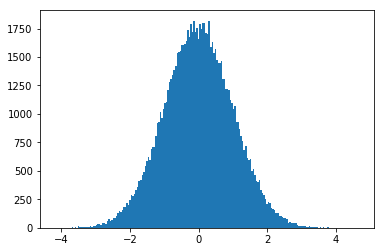

In [9]:
## simulation with numpy - in normal distribution 
rand = np.random.randn(100000);
plt.hist(rand, bins = 200);

There are many other wonderous things numpy can do, you will encounter them later in the course of the program. 

## Part II. Pandas
Pandas stand for paneled data, and it is the most popular library for data scientists to manipulate, clean, and organize dataset in Python. The most fundamental data structure that exists in Pandas is called **DataFrames**. 

In [10]:
!ls

Intro_to_libraries_1.ipynb    Statistics_Fundamentals.ipynb
Python_Fundamentals.ipynb     auto-mpg.csv
README.md


In [12]:
## importing data and look at optional parameters
df = pd.read_csv('auto-mpg.csv')
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


In [ ]:
# examine and read the data

In [13]:
# examine the information in this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [14]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [15]:
df.index

RangeIndex(start=0, stop=398, step=1)

In [16]:
type(df)

pandas.core.frame.DataFrame

In [17]:
type(df.mpg)

pandas.core.series.Series

In [21]:
# examine the datatypes of the dataframe
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
# talk about series and dataframe 
type(df)

In [ ]:
# series

In [ ]:
# indexing and subsetting 

# index by values (loc and iloc)


In [22]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [24]:
df.loc[2,'horsepower']

'150'

In [25]:
df.loc[4,'car name']

'ford torino'

In [26]:
df.iloc[4,8]

'ford torino'

In [29]:
# 2nd - 10th row, first 3 columns
df.iloc[2:11, :3]

,mpg,cylinders,displacement
2,18.0,8,318.0
3,16.0,8,304.0
4,17.0,8,302.0
5,15.0,8,429.0
6,14.0,8,454.0
7,14.0,8,440.0
8,14.0,8,455.0
9,15.0,8,390.0
10,15.0,8,383.0


In [32]:
# want weight greater than 3000
weight_greater_3000 = df[df.weight > 3000]

In [36]:
#weight_greater_3000['cylinders']

In [42]:
# examine whether we have missing value - it could really affect the data!
df.isna().sum().any()

False

In [45]:
# exercise - want weight greater than 3000 and mpg less than 18 
df[(df.weight > 3000) & (df.mpg < 18)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl
10,15.0,8,383.0,170,3563,10.0,70,1,dodge challenger se
11,14.0,8,340.0,160,3609,8.0,70,1,plymouth 'cuda 340


In [50]:
# exercise - get the cadf[(df.weight > 3000) & (df.mpg < 18)]rs that are heavier than 3000 but has a horsepower less than 150 
df[(df.weight > 3000) & (df.horsepower < 150)]
# should be 150 cars that satisfy the criteria 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
34,16.0,6,225.0,105,3439,15.5,71,1,plymouth satellite custom
35,17.0,6,250.0,100,3329,15.5,71,1,chevrolet chevelle malibu
36,19.0,6,250.0,88,3302,15.5,71,1,ford torino 500
37,18.0,6,232.0,100,3288,15.5,71,1,amc matador
47,19.0,6,250.0,100,3282,15.0,71,1,pontiac firebird
48,18.0,6,250.0,88,3139,14.5,71,1,ford mustang
73,13.0,8,307.0,130,4098,14.0,72,1,chevrolet chevelle concours (sw)
74,13.0,8,302.0,140,4294,16.0,72,1,ford gran torino (sw)


In [48]:
df['horsepower'] = df.horsepower.astype('int')
df = df.replace("?",0)

In [49]:
# seems like we have a problem! Can we try to debug this?
df['horsepower'] = df.horsepower.astype('int')

In [ ]:
# get rid of anomaly


In [ ]:
# exercise - get a list of car name where the mpg is less than 18 and weight is greater than 3500
